In [1]:
import numpy as np 
import pandas as pd 
import os
print(os.listdir("../input/facial-expression/fer2013/"))

['fer2013.csv']


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
print(os.listdir("../input/facial-expression/fer2013/"))

Using TensorFlow backend.


['fer2013.csv']


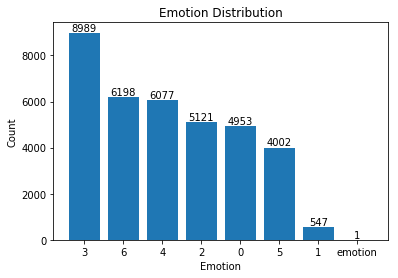

In [3]:
data_names = ['emotion', 'pixels', 'usage']
df = pd.read_csv('../input/facial-expression/fer2013/fer2013.csv', names=data_names, na_filter=False)

emotion_counts = df['emotion'].value_counts()

plt.bar(emotion_counts.index, emotion_counts.values)
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(emotion_counts.index)

for i, count in enumerate(emotion_counts.values):
    plt.text(emotion_counts.index[i], count, str(count), ha='center', va='bottom')

plt.title('Emotion Distribution')
plt.show()

In [4]:
filname = '../input/facial-expression/fer2013/fer2013.csv'
label = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
im=df['pixels']
df.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [5]:
def getData(filename):
    Y = []
    X = []
    with open(filename, 'r') as file:
        first_line = True
        for line in file:
            if first_line:
                first_line = False
            else:
                row = line.strip().split(',')
                Y.append(int(row[0]))
                X.append([int(p) for p in row[1].split()])

    X = np.array(X) / 255.0
    Y = np.array(Y)
    return X, Y

In [6]:
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)

7


In [7]:
# keras with tensorflow backend
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [9]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

In [10]:
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    #model.summary()
    
    return model
model=my_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)       512       
__________

In [1]:
path_model='model_filter.h5' # save model at this location after each epoch
K.tensorflow_backend.clear_session() # destroys the current graph and builds a new one
model=my_model() # create the model
K.set_value(model.optimizer.lr,1e-3) # set the learning rate
# fit the model
h=model.fit(x=X_train,     
            y=y_train, 
            batch_size=64, 
            epochs=15, 
            verbose=1, 
            validation_data=(X_test,y_test),
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )

NameError: name 'K' is not defined

In [12]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [13]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
plt.show()

In [14]:
y_pred=model.predict(X_test)
#print(y_pred)
y_test.shape

(3589, 7)

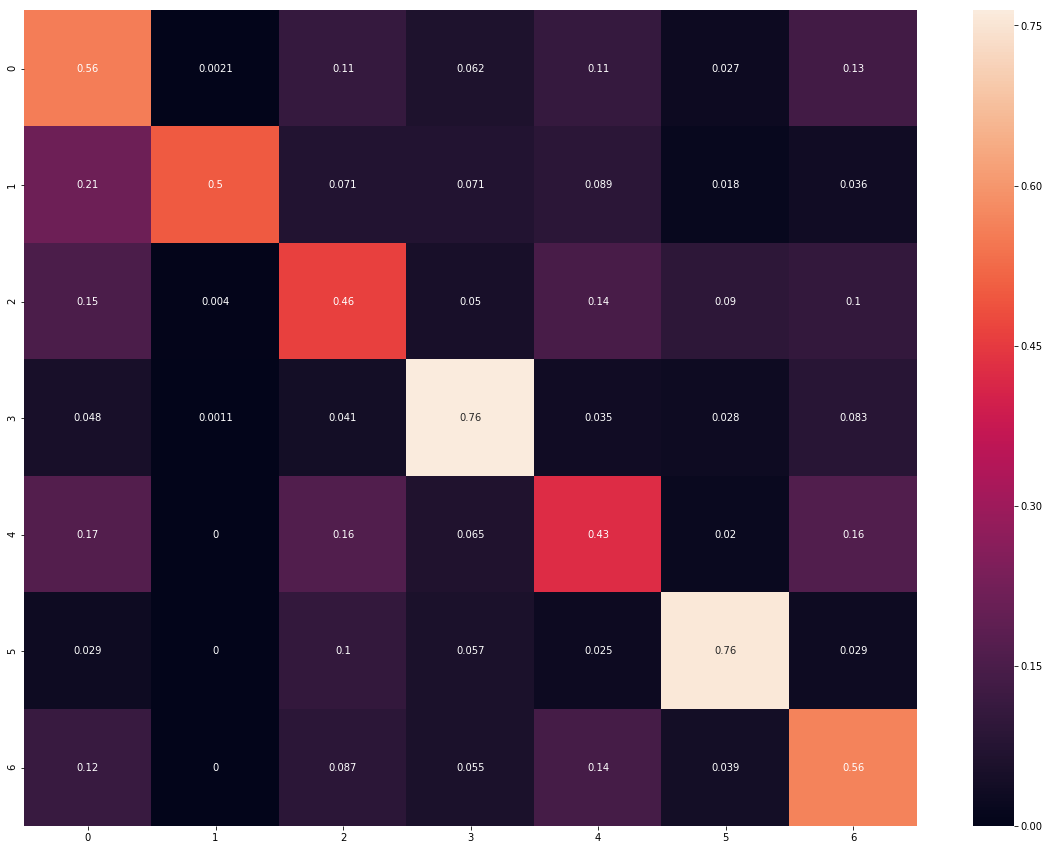

In [15]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
%matplotlib inline

# Convert continuous or multi-output targets to discrete class labels
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create DataFrame from normalized confusion matrix
df_cm = pd.DataFrame(cm, index = [i for i in range(7)], columns = [i for i in range(7)])

# Create heatmap
plt.figure(figsize = (20,15))
sn.heatmap(df_cm, annot=True)

**Real Time Expression Prediction**

/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


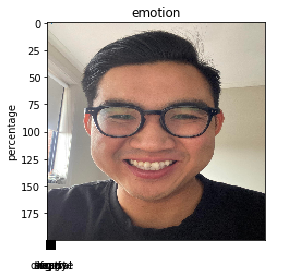

Expression Prediction: happy


In [16]:
from skimage import io
img = image.load_img('../input/mytestingimage/smile.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('../input/mytestingimage/smile.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])
        

Expression Prediction: 4


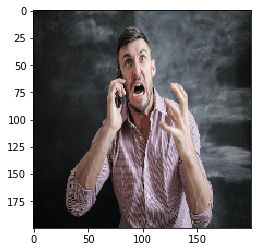

Accuracy Percentage: 71.84227705001831 %


In [17]:
from skimage import io
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess the image
img = image.load_img('../input/mytestingimage/angry.jpg', grayscale=True, target_size=(48, 48))
show_img = image.load_img('../input/mytestingimage/angry.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255

# Make emotion prediction
custom = model.predict(x)
emotion_prediction = custom[0]

# Find the index with the highest prediction value
ind = np.argmax(emotion_prediction)

# Print the predicted emotion
objects = ["0", "1", "2", "3", "4", "5", "6"]
print('Expression Prediction:', objects[ind])

# Display the image
x = np.array(x, 'float32')
x = x.reshape([48, 48])
plt.gray()
plt.imshow(show_img)
plt.show()

# Print the accuracy percentage
accuracy_percentage = emotion_prediction[ind] * 100
print('Accuracy Percentage:', accuracy_percentage, '%')

**Live Demo of Production Level Project**

[Facial Expression Detection Web App](https://faceai.herokuapp.com/)